# Modelo del Péndulo Simple

## Variables y Parámetros

Las variables y parámetros del sistema son:
\begin{align*}
    \theta &: \text{Ángulo del péndulo respecto a la vertical} \text{ [rad]} \\
    \dot{\theta} &: \text{Velocidad angular} \text{ [rad/s]} \\
    m &: \text{Masa de la bola} \text{ [kg]} \\
    l &: \text{Longitud del péndulo} \text{ [m]} \\
    g &: \text{Aceleración gravitacional} \text{ [m/s}^2\text{]} \\
    b &: \text{Coeficiente de fricción viscosa} \text{ [N$\cdot$m$\cdot$s/rad]} \\
    u &: \text{Torque de control aplicado} \text{ [N$\cdot$m]}
\end{align*}

## Ecuación Dinámica

La ecuación que describe la dinámica del péndulo es:

\begin{equation}
    ml^2\ddot{\theta} + b\dot{\theta} + mgl\sin(\theta) = u
\end{equation}

## Modelo en Espacio de Estados

Definiendo las variables de estado:
\begin{align*}
    x_1 &= \theta \\
    x_2 &= \dot{\theta}
\end{align*}

El modelo en espacio de estados queda:
\begin{equation}
    \begin{bmatrix} 
        \dot{x}_1 \\
        \dot{x}_2
    \end{bmatrix} = 
    \begin{bmatrix}
        x_2 \\
        -\frac{b}{ml^2}x_2 - \frac{g}{l}\sin(x_1) + \frac{1}{ml^2}u
    \end{bmatrix}
\end{equation}

## Modelo Linealizado

Para pequeñas oscilaciones alrededor del punto de equilibrio ($\theta = 0$), donde $\sin(\theta) \approx \theta$:
\begin{equation}
    \begin{bmatrix} 
        \dot{x}_1 \\
        \dot{x}_2
    \end{bmatrix} = 
    \begin{bmatrix}
        0 & 1 \\
        -\frac{g}{l} & -\frac{b}{ml^2}
    \end{bmatrix}
    \begin{bmatrix}
        x_1 \\
        x_2
    \end{bmatrix} +
    \begin{bmatrix}
        0 \\
        \frac{1}{ml^2}
    \end{bmatrix}u
\end{equation}

O en forma compacta:
\begin{equation}
    \dot{\mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{B}u
\end{equation}

Donde:
\begin{equation}
    \mathbf{A} = 
    \begin{bmatrix}
        0 & 1 \\
        -\frac{g}{l} & -\frac{b}{ml^2}
    \end{bmatrix}, \quad
    \mathbf{B} = 
    \begin{bmatrix}
        0 \\
        \frac{1}{ml^2}
    \end{bmatrix}
\end{equation}

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

class PenduloSimple:
    def __init__(self, m=1.0, l=1.0, g=9.81, b=0.1):
        """
        Inicializa el péndulo simple
        m: masa (kg)
        l: longitud (m)
        g: aceleración gravitacional (m/s^2)
        b: coeficiente de fricción
        """
        self.m = m  # masa
        self.l = l  # longitud
        self.g = g  # gravedad
        self.b = b  # fricción
        
    def ecuaciones_estado(self, estado, t, u=0):
        """
        Ecuaciones de estado del péndulo
        estado[0] = theta (ángulo)
        estado[1] = theta_dot (velocidad angular)
        u = torque de control
        """
        theta = estado[0]
        theta_dot = estado[1]
        # Ecuaciones diferenciales
        dtheta = theta_dot
        dtheta_dot = (-self.b*theta_dot - self.m*self.g*self.l*np.sin(theta) + u)/(self.m*self.l**2)
        
        return [dtheta, dtheta_dot]
    
    def simular(self, estado_inicial, t_span, u=0):
        """
        Simula el sistema
        estado_inicial: [theta_0, theta_dot_0]
        t_span: vector de tiempo
        u: entrada de control (puede ser escalar o función)
        """
        if callable(u):
            sol = odeint(lambda x, t: self.ecuaciones_estado(x, t, u(x, t)), estado_inicial, t_span)
        else:
            sol = odeint(lambda x, t: self.ecuaciones_estado(x, t, u), estado_inicial, t_span)
        return sol



# Simulacion sin control

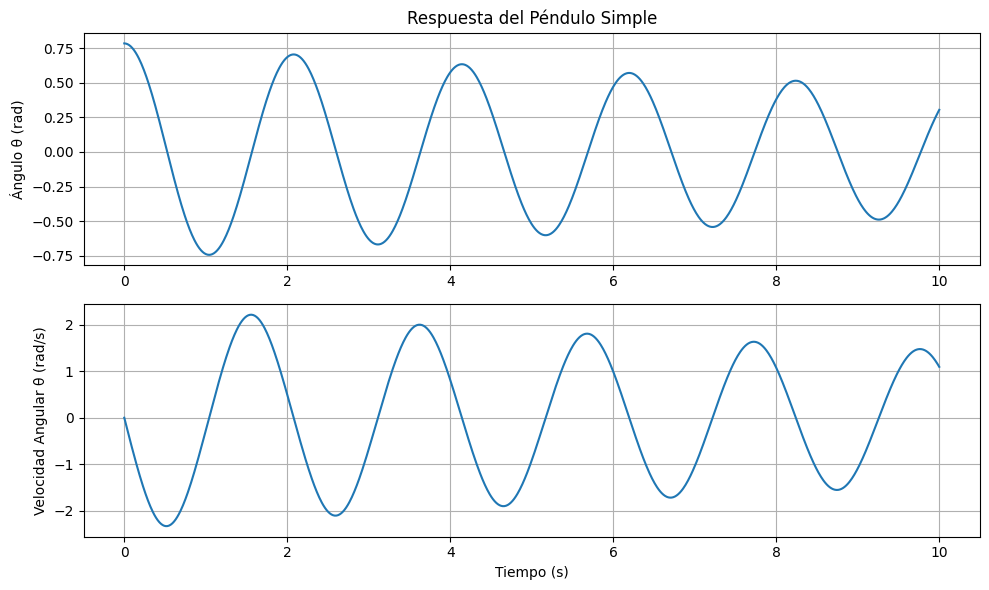

In [ ]:
# Ejemplo de uso
#if __name__ == "__main__":
# Crear instancia del péndulo
pendulo = PenduloSimple()

# Parámetros de simulación
t = np.linspace(0, 10, 1000)  # vector de tiempo
estado_inicial = [np.pi/4, 0]  # θ₀ = π/4, θ̇₀ = 0

# Simular sistema sin control
sol = pendulo.simular(estado_inicial, t)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(t, sol[:,0])
plt.grid(True)
plt.ylabel('Ángulo θ (rad)')
plt.title('Respuesta del Péndulo Simple')

plt.subplot(2,1,2)
plt.plot(t, sol[:,1])
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular θ̇ (rad/s)')

plt.tight_layout()
plt.show()

In [ ]:
def control_retroalimentacion(estado, t):
    return -K[0]*estado[0] - K[1]*estado[1]  # u = -K·x

In [11]:
# Caso 1: Control que depende del estado
def mi_control(estado, t):
    theta = estado[0]
    omega = estado[1]
    return -2*theta - 1*omega  # Control PD simple

## Simular con control retroalimentado
#sol1 = pendulo.simular(estado_inicial, t, u=mi_control)

## Caso 2: Control constante
#sol2 = pendulo.simular(estado_inicial, t, u=1.5)

# Control PD

In [6]:
# Caso 1: Control que depende del estado
def mi_control(estado, t):
    theta = estado[0]
    omega = estado[1]
    return -2*theta - 1*omega  # Control PD simple

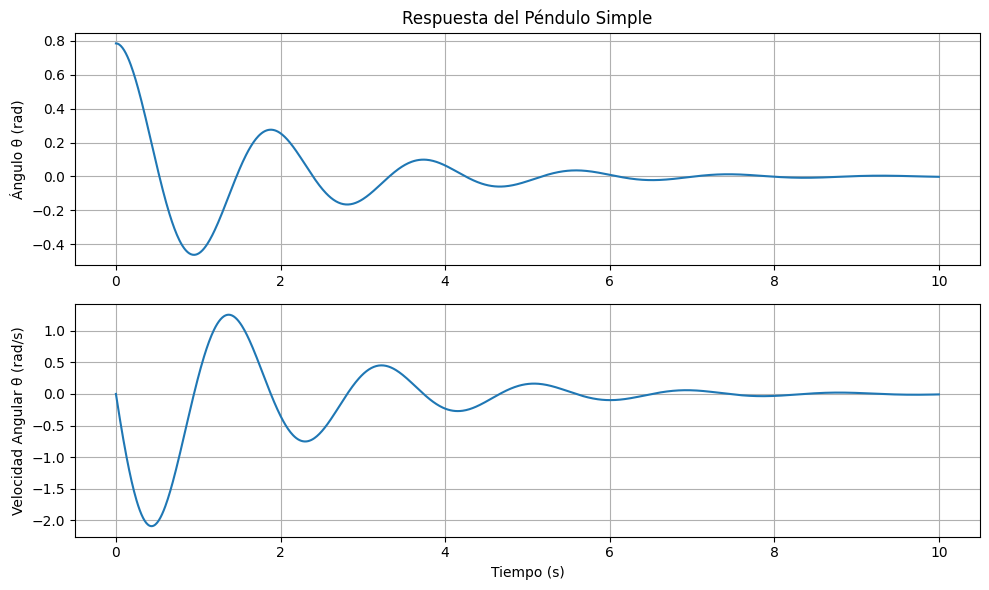

In [7]:
pendulo = PenduloSimple()

# Parámetros de simulación
t = np.linspace(0, 10, 1000)  # vector de tiempo
estado_inicial = [np.pi/4, 0]  # θ₀ = π/4, θ̇₀ = 0

# Simular sistema sin control
#sol = pendulo.simular(estado_inicial, t)
sol = pendulo.simular(estado_inicial, t, u=mi_control)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(t, sol[:,0])
plt.grid(True)
plt.ylabel('Ángulo θ (rad)')
plt.title('Respuesta del Péndulo Simple')

plt.subplot(2,1,2)
plt.plot(t, sol[:,1])
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular θ̇ (rad/s)')

plt.tight_layout()
plt.show()

# Control Retroalimentado

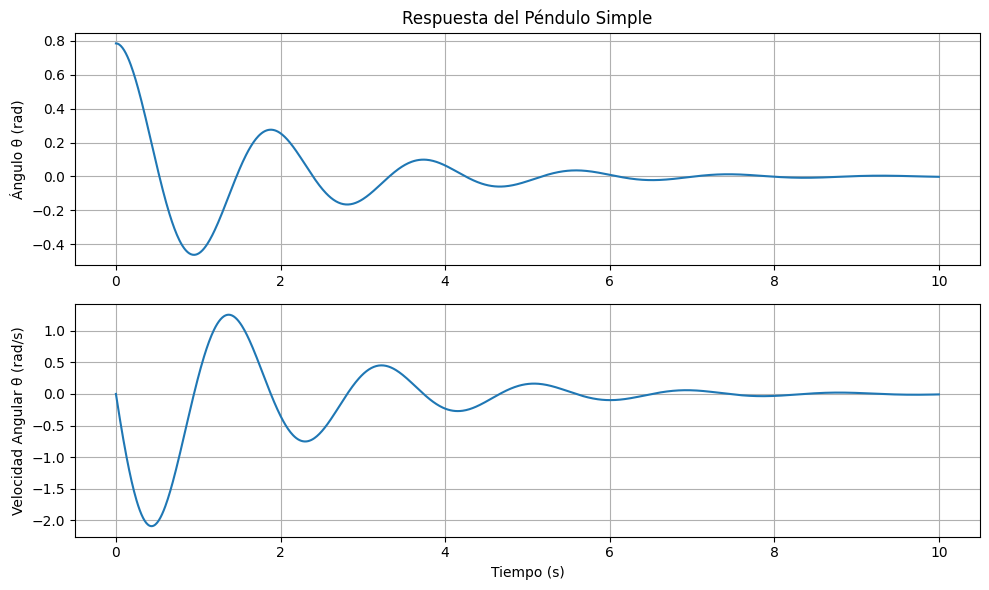

In [10]:
def control_retroalimentacion(estado, t):
    return -K[0]*estado[0] - K[1]*estado[1]  # u = -K·x

pendulo = PenduloSimple()

# Parámetros de simulación
t = np.linspace(0, 10, 1000)  # vector de tiempo
estado_inicial = [np.pi/4, 0]  # θ₀ = π/4, θ̇₀ = 0
K = [2, 1]  # Ganancias del controlador
# Simular sistema sin control
#sol = pendulo.simular(estado_inicial, t)
sol = pendulo.simular(estado_inicial, t, u=control_retroalimentacion)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(t, sol[:,0])
plt.grid(True)
plt.ylabel('Ángulo θ (rad)')
plt.title('Respuesta del Péndulo Simple')

plt.subplot(2,1,2)
plt.plot(t, sol[:,1])
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular θ̇ (rad/s)')

plt.tight_layout()
plt.show()

# Dinámica original del sistema:

La ecuación que describe la dinámica del péndulo es:

\begin{equation}
    ml^2\ddot{\theta} + b\dot{\theta} + mgl\sin(\theta) = u
\end{equation}

Reescribiendo como:

\begin{equation}
     \ddot{\theta} = - \frac{b}{ml^2} \dot{\theta} - \frac{g}{l}\sin(\theta) + \frac{1}{ml^2}u
\end{equation}

## Paso 1: Redefinir el control para cancelar la no linealidad

Supongamos que definimos un nuevo control $u$ como:

\begin{equation}
     u = ml^2(  \frac{b}{ml^2} \dot{\theta}  + \frac{g}{l}\sin(\theta) + v)
\end{equation}

Aquí:


- $v$ es un término auxiliar que representará el control lineal deseado.

Sustituyendo $u$ en la ecuación, la dinámica queda como:

\begin{equation}
     \ddot{\theta} = v
\end{equation}

Esto significa que hemos "linealizado" el sistema. Ahora, podemos diseñar el control auxiliar 
$v$ para lograr el seguimiento de la señal deseada.

## Paso 2: Diseñar el control $v$ para seguimiento

Supongamos que queremos que $\theta(t)$ siga una señal de referencia $\theta_r(t)$. Definimos el error como:

$$e = \theta -\theta_r,  \quad \dot{e} = \dot{\theta} -\dot{\theta}_r$$

La dinámica del error es:

$$\ddot{e} = \ddot{\theta} -\ddot{\theta_r} = v - \ddot{\theta}_r$$

Para estabilizar el error, diseñamos $v$ como:

$$v = \ddot{\theta}_r - k_1\dot{e} - k_2e$$

Aquí, $k_1 > 0$ y $k_2 > 0$ son ganancias del controlador que determinan la estabilidad y la velocidad de convergencia del error.

Sustituyendo $v$ en la ecuación:

$$\ddot{e} + k_1\dot{e} + k_2e = 0 $$

Esta es una ecuación diferencial lineal, cuya solución asegura que el error converge a cero si 
$k_1$ y $k_2$  están bien elegidos.

## Implementar el control completo

El control final es:

$$ u = ml^2 \left( \ddot{\theta}_r - k_1(\dot{\theta} - \dot{\theta}_r) - k_2(\theta - \theta_r)) + \frac{b}{ml^2}\theta + \frac{g}{L} \sin(\theta)   \right) $$

## Verificar estabilidad

Con las ganancias $k_1$ y $k_2$, podemos usar análisis de Lyapunov para demostrar que el sistema es estable globalmente si la dinámica no lineal es correctamente compensada. La función candidata es:

$$V(e,\dot{e}) = \frac{1}{2} e^2 + \frac{1}{2} \dot{e}^2 $$

y su derivada muestra convergencia si $k_1, k_2 >0 $

# Explicacion de otro modo:

## Diseño del Controlador para Seguimiento de Señal en el Péndulo Simple

### Dinámica Original del Sistema

La ecuación dinámica del péndulo simple es:

```math
mL^2\ddot{\theta} + b\dot{\theta} + m g L \sin(\theta) = u
```
Reescribiéndola en términos de $\ddot{\theta}$:
$$
\ddot{\theta} = -\frac{b}{mL^2}\dot{\theta} - \frac{g}{L}\sin(\theta) + \frac{1}{mL^2}u
$$


### Redefinir el Control para Cancelar la No Linealidad

Definimos un nuevo control $u$ como:
$$
u = mL^2\big(v + \frac{b}{mL^2}\dot{\theta} + \frac{g}{L}\sin(\theta)\big)
$$
Donde $v$ es un término auxiliar que representará el control lineal deseado. 

Sustituyendo $u$ en la ecuación, la dinámica del sistema se convierte en:
$$
\ddot{\theta} = v
$$

Esto "linealiza" la dinámica del sistema.

### Dinámica del Error

**Dinámica del error:** Queremos que el ángulo $\theta(t)$ siga una trayectoria de referencia $\theta_r(t)$. Definimos el error:
$$
e = \theta - \theta_r, \quad \dot{e} = \dot{\theta} - \dot{\theta}_r
$$
La segunda derivada del error es:
$$
\ddot{e} = \ddot{\theta} - \ddot{\theta}_r
$$
Sustituyendo la dinámica linealizada ($\ddot{\theta} = v$):
$$
\ddot{e} = v - \ddot{\theta}_r
$$

## Diseño de $v$

**Diseño de v para estabilizar el error:** Queremos que $e$ y $\dot{e}$ tiendan a cero (es decir, que $\theta(t)$ siga $\theta(t)_r$. Para esto, **diseñamos una dinámica deseada para el error** como una ecuación diferencial estable:

$$
\textcolor{#009dff}{ \ddot{e} + k_1\dot{e} + k_2e = 0}
$$

Esta es una ecuación diferencial lineal de segundo orden que garantiza la convergencia del error al equilibrio (cero) si las ganancias $k_1 > 0$ y $k_2 > 0$ están bien elegidas. Se comporta como un sistema subamortiguado, críticamente amortiguado o sobreamortiguado, dependiendo de los valores de 
$k_1$ y $k_2$.


**Forma explícita de $v$**: Para que la dinámica del error satisfaga esta ecuación diferencial, igualamos 
$\ddot{e}$:

$$\textcolor{#009dff}{\ddot{e} = v - \ddot{\theta}_r = -k_1\dot{e} - k_2e } $$

Por lo tanto:
$$
v = \ddot{\theta}_r - k_1\dot{e} - k_2e
$$

Sustituyendo $e = \theta - \theta_r$ y $\dot{e} = \dot{\theta} - \dot{\theta}_r$:
$$
v = \ddot{\theta}_r - k_1(\dot{\theta} - \dot{\theta}_r) - k_2(\theta - \theta_r)
$$

### Control Completo

El control completo es:

$$
u = mL^2\big(\ddot{\theta}_r - k_1(\dot{\theta} - \dot{\theta}_r) - k_2(\theta - \theta_r) + \frac{b}{mL^2}\dot{\theta} + \frac{g}{L}\sin(\theta)\big)
$$

### Estabilidad del Sistema
La dinámica del error queda:
$$
\ddot{e} + k_1\dot{e} + k_2e = 0
$$
Esta es una ecuación diferencial estable si $k_1 > 0$ y $k_2 > 0$. Se puede analizar usando una función de Lyapunov:
$$
V(e, \dot{e}) = \frac{1}{2}e^2 + \frac{1}{2}\dot{e}^2
$$
La derivada de $V$ es negativa, lo que demuestra la estabilidad del sistema.

### Ajuste de $k_1$ y $k_2$
- $k_2$: Control proporcional que reduce el error más rápidamente.
- $k_1$: Control derivativo que amortigua las oscilaciones.


# Demostración de Estabilidad con Lyapunov

## Función candidata de Lyapunov
Seleccionamos una función de Lyapunov candidata para el sistema basada en la energía del error y su derivada:
$$
V(e, \dot{e}) = \frac{1}{2}e^2 + \frac{1}{2}\dot{e}^2
$$

### Propiedades de $V(e, \dot{e})$:
1. $V(e, \dot{e}) > 0$ para $e \neq 0$ y $\dot{e} \neq 0$ (positiva definida).
2. $V(e, \dot{e}) = 0$ si $e = 0$ y $\dot{e} = 0$ (punto de equilibrio).

Esto asegura que $V(e, \dot{e})$ es una buena candidata para analizar la estabilidad.

---

## Derivada de Lyapunov
Calculamos la derivada temporal de $V(e, \dot{e})$:
$$
\dot{V}(e, \dot{e}) = \frac{\partial V}{\partial e} \dot{e} + \frac{\partial V}{\partial \dot{e}} \ddot{e}
$$
Sustituyendo las derivadas parciales:
$$
\frac{\partial V}{\partial e} = e, \quad \frac{\partial V}{\partial \dot{e}} = \dot{e}
$$
Por lo tanto:
$$
\dot{V}(e, \dot{e}) = e\dot{e} + \dot{e}\ddot{e}
$$

---

## Sustitución de la dinámica del error
La dinámica del error está dada por:
$$
\ddot{e} = -k_1\dot{e} - k_2e
$$
Sustituyendo $\ddot{e}$ en la expresión de $\dot{V}$:
$$
\dot{V}(e, \dot{e}) = e\dot{e} + \dot{e}(-k_1\dot{e} - k_2e)
$$
Simplificando:
$$
\dot{V}(e, \dot{e}) = e\dot{e} - k_1\dot{e}^2 - k_2e\dot{e}
$$
Agrupando términos similares:
$$
\dot{V}(e, \dot{e}) = -k_1\dot{e}^2 - k_2e^2
$$

---

## Interpretación de $\dot{V}(e, \dot{e})$
1. $\dot{V}(e, \dot{e}) \leq 0$ si $k_1 > 0$ y $k_2 > 0$. Esto indica que la energía total $V(e, \dot{e})$ del sistema no aumenta con el tiempo.
2. $\dot{V}(e, \dot{e}) = 0$ únicamente cuando $e = 0$ y $\dot{e} = 0$, lo cual corresponde al punto de equilibrio deseado.

---

## Conclusión
La función de Lyapunov $V(e, \dot{e})$ demuestra que el sistema es **globalmente estable en el sentido de Lyapunov**, ya que:
- $V(e, \dot{e}) > 0$ para $e \neq 0$ o $\dot{e} \neq 0$.
- $\dot{V}(e, \dot{e}) \leq 0$ para todo $e, \dot{e}$.

Además, con $k_1 > 0$ y $k_2 > 0$, el error $e$ y su derivada $\dot{e}$ convergen a cero, garantizando el seguimiento de la señal de referencia $\theta_r(t)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PenduloSimple as system

In [2]:
pendulo = system.PenduloSimple()#PenduloSimple()

In [3]:
param = pendulo.parametros()
param

{'m': 1.0, 'l': 1.0, 'g': 9.81, 'b': 0.1}

In [4]:
#m, l, g, b = param.values()
m,l,g,b = param['m'],param['l'],param['g'], param['b']


In [5]:
import sympy as sp
sp.init_printing()

In [6]:
sp_t = sp.symbols('t', real=True)
#sp_theta = sp.Function('theta', real=True)(sp_t)
sp_f_ref =sp.sin(sp_t)
sp_f_ref,sp.diff(sp_f_ref,sp_t),sp.diff(sp_f_ref,sp_t,2)

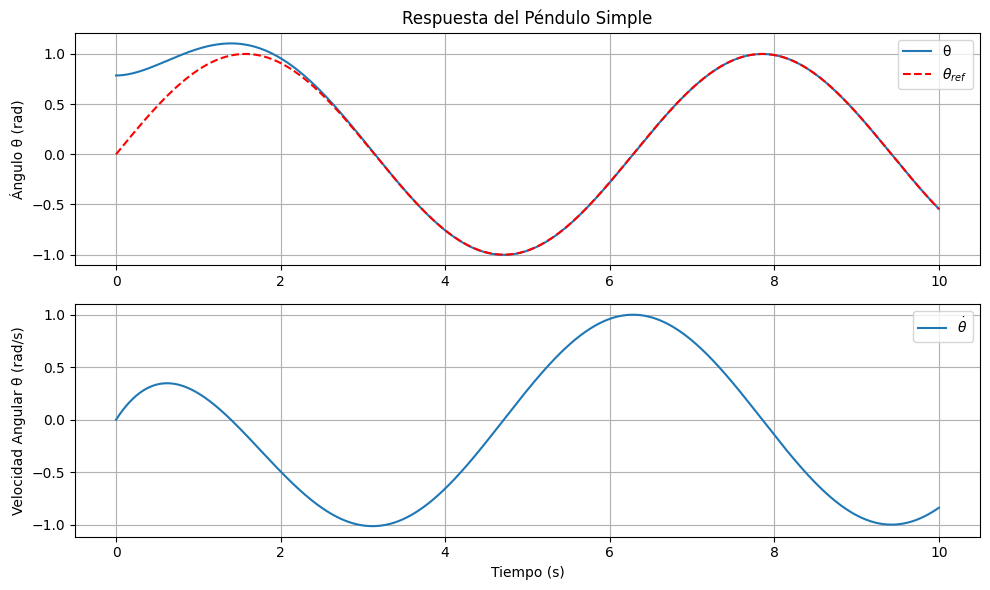

In [7]:
def control_retroalimentacion(estado, t):
    theta_ref = np.sin(t)
    dtheta_ref = np.cos(t)  
    ddtheta_ref = -np.sin(t)  
    theta,dtheta = estado
    k1,k2 = 2,1
    
    e = theta - theta_ref  # Error
    de = dtheta - dtheta_ref  # Derivada del error

    u = m*l**2*( ddtheta_ref - k1*(de) -k2*(e) + (b/(m*l**2))*dtheta + (g/l)*np.sin(theta) )  # Control
    return u  


# Parámetros de simulación
t = np.linspace(0, 10, 1000)  # vector de tiempo
theta_ref = np.sin(t)
dtheta_ref = np.cos(t)

estado_inicial = [np.pi/4, 0]  # θ₀ = π/4, θ̇₀ = 0

## Simular sistema sin control
#sol = pendulo.simular(estado_inicial, t)
sol = pendulo.simular(estado_inicial, t, u=control_retroalimentacion)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(t, sol[:,0])
plt.plot(t, theta_ref, 'r--')
plt.legend(['θ', '$θ_{ref}$'])
plt.grid(True)
plt.ylabel('Ángulo θ (rad)')
plt.title('Respuesta del Péndulo Simple')

plt.subplot(2,1,2)
plt.plot(t, sol[:,1])
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular θ̇ (rad/s)')
plt.legend(['$\\dot{θ}$'])
plt.tight_layout()
plt.show()
